In [43]:
import pandas as pd
import numpy as np

In [3]:
!pip install openpyxl==3.1.0

In [4]:
df = pd.read_excel('Sales.xlsx')

#### Data Exploration

In [5]:
df.head(9)

,OrderNo,SalesOrderLineKey,OrderQuantity,ItemCost,ItemPrice,OrderDate,DeliveryDueDate,CustomerName,CustomerCity,CustomerState,CustomerCountry,ProductCategory,ProductSubcategory,Product,ProductColor,Model
0,SO43697,43697001,1,2171.29,3578.27,2017-07-01,2017-07-03,Cole Watson,Metchosin,British Columbia,Canada,Bikes,Road Bikes,"Road-150 Red, 62",Red,Road-150
1,SO43698,43698001,1,1912.15,3399.99,2017-07-01,2017-07-03,Rachael Martinez,Pantin,Seine Saint Denis,France,Bikes,Mountain Bikes,"Mountain-100 Silver, 44",Silver,Mountain-100
2,SO43699,43699001,1,1912.15,3399.99,2017-07-01,2017-07-03,Sydney Wright,Lebanon,Oregon,United States,Bikes,Mountain Bikes,"Mountain-100 Silver, 44",Silver,Mountain-100
3,SO43700,43700001,1,413.15,699.10,2017-07-01,2017-07-09,Ruben Prasad,Beverly Hills,California,United States,Bikes,Road Bikes,"Road-650 Black, 62",Black,Road-650
4,SO43701,43701001,1,1912.15,3399.99,2017-07-01,2017-07-07,Christy Zhu,North Ryde,New South Wales,Australia,Bikes,Mountain Bikes,"Mountain-100 Silver, 44",Silver,Mountain-100
5,SO43702,43702001,1,2171.29,3578.27,2017-07-01,2017-07-07,Colin Anand,Coronado,California,United States,Bikes,Road Bikes,"Road-150 Red, 44",Red,Road-150
6,SO43703,43703001,1,2171.29,3578.27,2017-07-01,2017-07-14,Albert Alvarez,Perth,South Australia,Australia,Bikes,Road Bikes,"Road-150 Red, 62",Red,Road-150
7,SO43704,43704001,1,1898.09,3374.99,2017-07-01,2017-07-07,Julio Ruiz,East Brisbane,Queensland,Australia,Bikes,Mountain Bikes,"Mountain-100 Black, 48",Black,Mountain-100
8,SO43705,43705001,1,1912.15,3399.99,2017-07-01,2017-07-13,Curtis Lu,East Brisbane,Queensland,Australia,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",Silver,Mountain-100


In [6]:
df.tail()

,OrderNo,SalesOrderLineKey,OrderQuantity,ItemCost,ItemPrice,OrderDate,DeliveryDueDate,CustomerName,CustomerCity,CustomerState,CustomerCountry,ProductCategory,ProductSubcategory,Product,ProductColor,Model
60393,SO75122,75122001,1,8.22,21.98,2020-06-15,2020-06-22,Caleb Lal,Sooke,British Columbia,Canada,Accessories,Fenders,Fender Set - Mountain,NaN,Fender Set - Mountain
60394,SO75122,75122002,1,6.92,8.99,2020-06-15,2020-06-26,Caleb Lal,Sooke,British Columbia,Canada,Clothing,Caps,AWC Logo Cap,Multi,Cycling Cap
60395,SO75123,75123001,1,8.22,21.98,2020-06-15,2020-06-25,Devin Phillips,Sooke,British Columbia,Canada,Accessories,Fenders,Fender Set - Mountain,NaN,Fender Set - Mountain
60396,SO75123,75123002,1,59.47,159.00,2020-06-15,2020-06-22,Devin Phillips,Sooke,British Columbia,Canada,Accessories,Bike Stands,All-Purpose Bike Stand,NaN,All-Purpose Bike Stand
60397,SO75123,75123003,1,6.92,8.99,2020-06-15,2020-06-23,Devin Phillips,Sooke,British Columbia,Canada,Clothing,Caps,AWC Logo Cap,Multi,Cycling Cap


In [7]:
df.columns

Index(['OrderNo', 'SalesOrderLineKey', 'OrderQuantity', 'ItemCost',
       'ItemPrice', 'OrderDate', 'DeliveryDueDate', 'CustomerName',
       'CustomerCity', 'CustomerState', 'CustomerCountry', 'ProductCategory',
       'ProductSubcategory', 'Product', 'ProductColor', 'Model'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60398 entries, 0 to 60397
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   OrderNo             60398 non-null  object        
 1   SalesOrderLineKey   60398 non-null  int64         
 2   OrderQuantity       60398 non-null  int64         
 3   ItemCost            60398 non-null  float64       
 4   ItemPrice           60398 non-null  float64       
 5   OrderDate           60398 non-null  datetime64[ns]
 6   DeliveryDueDate     60398 non-null  datetime64[ns]
 7   CustomerName        60398 non-null  object        
 8   CustomerCity        60398 non-null  object        
 9   CustomerState       60398 non-null  object        
 10  CustomerCountry     60398 non-null  object        
 11  ProductCategory     60398 non-null  object        
 12  ProductSubcategory  60398 non-null  object        
 13  Product             60398 non-null  object    

###### Observation

Almost half of Product Color is null. The rest of the data seems to be fine

In [9]:
df.shape

(60398, 16)

In [10]:
df.describe()

,SalesOrderLineKey,OrderQuantity,ItemCost,ItemPrice,OrderDate,DeliveryDueDate
count,6.039800e+04,60398.0,60398.000000,60398.000000,60398,60398
mean,6.184938e+07,1.0,286.066725,486.086922,2019-11-10 07:56:13.025596928,2019-11-17 19:13:20.966919424
min,4.369700e+07,1.0,0.860000,2.290000,2017-07-01 00:00:00,2017-07-03 00:00:00
25%,5.556000e+07,1.0,2.970000,7.950000,2019-09-04 00:00:00,2019-09-11 00:00:00
50%,6.210400e+07,1.0,11.220000,29.990000,2019-12-15 00:00:00,2019-12-22 00:00:00
75%,6.865000e+07,1.0,294.580000,539.990000,2020-03-20 00:00:00,2020-03-28 00:00:00
max,7.512300e+07,1.0,2171.290000,3578.270000,2020-06-15 00:00:00,2020-06-29 00:00:00
std,8.030547e+06,0.0,552.456782,928.489878,NaN,NaN


##### Interesting insights/points

- The records show that for each sale, only one item is bought.

- indicate the unit of sale



In [38]:
cat_columns = [i for i in df.select_dtypes(include=['object']).columns]

In [39]:
df.select_dtypes(include=['object']).columns

Index(['Customer Name', 'CustomerCity', 'CustomerState', 'CustomerCountry',
       'ProductCategory', 'ProductSubcategory', 'Product', 'Model'],
      dtype='object')

In [40]:
cat_columns

['Customer Name',
 'CustomerCity',
 'CustomerState',
 'CustomerCountry',
 'ProductCategory',
 'ProductSubcategory',
 'Product',
 'Model']

In [14]:
for column in cat_columns:
    print(f'Value count of {column}')
    print('                  ')
    print('--------------------')
    print(df[column].value_counts())

Value count of OrderNo
                  
--------------------
OrderNo
SO70714    8
SO72656    8
SO58845    8
SO60233    7
SO51555    7
          ..
SO50869    1
SO50868    1
SO68319    1
SO50867    1
SO43697    1
Name: count, Length: 27659, dtype: int64
Value count of CustomerName
                  
--------------------
CustomerName
Ashley Henderson    68
Fernando Barnes     67
Charles Jackson     65
Jennifer Simmons    63
Henry Garcia        62
                    ..
Shelby Murphy        1
Jada Morris          1
Lucas Hayes          1
Alison Andersen      1
Jonathan White       1
Name: count, Length: 18400, dtype: int64
Value count of CustomerCity
                  
--------------------
CustomerCity
London         1579
Paris          1174
Cliffside       918
Chula Vista     583
Berlin          583
               ... 
Chehalis          1
Byron             1
Braintree         1
Barstow           1
Bellevue          1
Name: count, Length: 269, dtype: int64
Value count of CustomerState
 

#### Drilling down Data

In [15]:
df.head()

,OrderNo,SalesOrderLineKey,OrderQuantity,ItemCost,ItemPrice,OrderDate,DeliveryDueDate,CustomerName,CustomerCity,CustomerState,CustomerCountry,ProductCategory,ProductSubcategory,Product,ProductColor,Model
0,SO43697,43697001,1,2171.29,3578.27,2017-07-01,2017-07-03,Cole Watson,Metchosin,British Columbia,Canada,Bikes,Road Bikes,"Road-150 Red, 62",Red,Road-150
1,SO43698,43698001,1,1912.15,3399.99,2017-07-01,2017-07-03,Rachael Martinez,Pantin,Seine Saint Denis,France,Bikes,Mountain Bikes,"Mountain-100 Silver, 44",Silver,Mountain-100
2,SO43699,43699001,1,1912.15,3399.99,2017-07-01,2017-07-03,Sydney Wright,Lebanon,Oregon,United States,Bikes,Mountain Bikes,"Mountain-100 Silver, 44",Silver,Mountain-100
3,SO43700,43700001,1,413.15,699.10,2017-07-01,2017-07-09,Ruben Prasad,Beverly Hills,California,United States,Bikes,Road Bikes,"Road-650 Black, 62",Black,Road-650
4,SO43701,43701001,1,1912.15,3399.99,2017-07-01,2017-07-07,Christy Zhu,North Ryde,New South Wales,Australia,Bikes,Mountain Bikes,"Mountain-100 Silver, 44",Silver,Mountain-100


In [16]:
df['CustomerName']

0             Cole Watson
1        Rachael Martinez
2           Sydney Wright
3            Ruben Prasad
4             Christy Zhu
               ...       
60393           Caleb Lal
60394           Caleb Lal
60395      Devin Phillips
60396      Devin Phillips
60397      Devin Phillips
Name: CustomerName, Length: 60398, dtype: object

In [17]:
df[['CustomerName', 'OrderDate','OrderQuantity']].head()

,CustomerName,OrderDate,OrderQuantity
0,Cole Watson,2017-07-01,1
1,Rachael Martinez,2017-07-01,1
2,Sydney Wright,2017-07-01,1
3,Ruben Prasad,2017-07-01,1
4,Christy Zhu,2017-07-01,1


In [18]:
df[df['CustomerName'] == 'Cole Watson']

,OrderNo,SalesOrderLineKey,OrderQuantity,ItemCost,ItemPrice,OrderDate,DeliveryDueDate,CustomerName,CustomerCity,CustomerState,CustomerCountry,ProductCategory,ProductSubcategory,Product,ProductColor,Model
0,SO43697,43697001,1,2171.29,3578.27,2017-07-01,2017-07-03,Cole Watson,Metchosin,British Columbia,Canada,Bikes,Road Bikes,"Road-150 Red, 62",Red,Road-150
16743,SO56212,56212001,1,294.58,539.99,2019-09-15,2019-09-20,Cole Watson,Metchosin,British Columbia,Canada,Bikes,Mountain Bikes,"Mountain-500 Black, 52",Black,Mountain-500


In [19]:
df.loc[df['CustomerName'] == 'Cole Watson', ['ItemCost', 'OrderDate', 'CustomerName']]

,ItemCost,OrderDate,CustomerName
0,2171.29,2017-07-01,Cole Watson
16743,294.58,2019-09-15,Cole Watson


In [20]:
df.loc[df['ItemCost'] > 1500, 'ItemCost':'CustomerName']

,ItemCost,ItemPrice,OrderDate,DeliveryDueDate,CustomerName
0,2171.29,3578.27,2017-07-01,2017-07-03,Cole Watson
1,1912.15,3399.99,2017-07-01,2017-07-03,Rachael Martinez
2,1912.15,3399.99,2017-07-01,2017-07-03,Sydney Wright
4,1912.15,3399.99,2017-07-01,2017-07-07,Christy Zhu
5,2171.29,3578.27,2017-07-01,2017-07-07,Colin Anand
...,...,...,...,...,...
57815,1554.95,2443.35,2020-05-28,2020-06-04,Jake Chen
57989,1554.95,2443.35,2020-05-29,2020-05-30,Brett Raman
57992,1554.95,2443.35,2020-05-29,2020-05-31,Nancy Sanchez
58065,1554.95,2443.35,2020-05-30,2020-06-07,Jordan Foster


In [21]:
df.loc[0:10,'ItemCost':'CustomerName']

,ItemCost,ItemPrice,OrderDate,DeliveryDueDate,CustomerName
0,2171.29,3578.27,2017-07-01,2017-07-03,Cole Watson
1,1912.15,3399.99,2017-07-01,2017-07-03,Rachael Martinez
2,1912.15,3399.99,2017-07-01,2017-07-03,Sydney Wright
3,413.15,699.10,2017-07-01,2017-07-09,Ruben Prasad
4,1912.15,3399.99,2017-07-01,2017-07-07,Christy Zhu
5,2171.29,3578.27,2017-07-01,2017-07-07,Colin Anand
6,2171.29,3578.27,2017-07-01,2017-07-14,Albert Alvarez
7,1898.09,3374.99,2017-07-01,2017-07-07,Julio Ruiz
8,1912.15,3399.99,2017-07-01,2017-07-13,Curtis Lu
9,2171.29,3578.27,2017-07-02,2017-07-13,Edward Brown


In [22]:
df.head()

,OrderNo,SalesOrderLineKey,OrderQuantity,ItemCost,ItemPrice,OrderDate,DeliveryDueDate,CustomerName,CustomerCity,CustomerState,CustomerCountry,ProductCategory,ProductSubcategory,Product,ProductColor,Model
0,SO43697,43697001,1,2171.29,3578.27,2017-07-01,2017-07-03,Cole Watson,Metchosin,British Columbia,Canada,Bikes,Road Bikes,"Road-150 Red, 62",Red,Road-150
1,SO43698,43698001,1,1912.15,3399.99,2017-07-01,2017-07-03,Rachael Martinez,Pantin,Seine Saint Denis,France,Bikes,Mountain Bikes,"Mountain-100 Silver, 44",Silver,Mountain-100
2,SO43699,43699001,1,1912.15,3399.99,2017-07-01,2017-07-03,Sydney Wright,Lebanon,Oregon,United States,Bikes,Mountain Bikes,"Mountain-100 Silver, 44",Silver,Mountain-100
3,SO43700,43700001,1,413.15,699.10,2017-07-01,2017-07-09,Ruben Prasad,Beverly Hills,California,United States,Bikes,Road Bikes,"Road-650 Black, 62",Black,Road-650
4,SO43701,43701001,1,1912.15,3399.99,2017-07-01,2017-07-07,Christy Zhu,North Ryde,New South Wales,Australia,Bikes,Mountain Bikes,"Mountain-100 Silver, 44",Silver,Mountain-100


In [23]:
df.iloc[0:10, 0:5]

,OrderNo,SalesOrderLineKey,OrderQuantity,ItemCost,ItemPrice
0,SO43697,43697001,1,2171.29,3578.27
1,SO43698,43698001,1,1912.15,3399.99
2,SO43699,43699001,1,1912.15,3399.99
3,SO43700,43700001,1,413.15,699.10
4,SO43701,43701001,1,1912.15,3399.99
5,SO43702,43702001,1,2171.29,3578.27
6,SO43703,43703001,1,2171.29,3578.27
7,SO43704,43704001,1,1898.09,3374.99
8,SO43705,43705001,1,1912.15,3399.99
9,SO43706,43706001,1,2171.29,3578.27


In [24]:
df.query('ItemPrice > 3000 or ItemCost > 1000')

,OrderNo,SalesOrderLineKey,OrderQuantity,ItemCost,ItemPrice,OrderDate,DeliveryDueDate,CustomerName,CustomerCity,CustomerState,CustomerCountry,ProductCategory,ProductSubcategory,Product,ProductColor,Model
0,SO43697,43697001,1,2171.29,3578.27,2017-07-01,2017-07-03,Cole Watson,Metchosin,British Columbia,Canada,Bikes,Road Bikes,"Road-150 Red, 62",Red,Road-150
1,SO43698,43698001,1,1912.15,3399.99,2017-07-01,2017-07-03,Rachael Martinez,Pantin,Seine Saint Denis,France,Bikes,Mountain Bikes,"Mountain-100 Silver, 44",Silver,Mountain-100
2,SO43699,43699001,1,1912.15,3399.99,2017-07-01,2017-07-03,Sydney Wright,Lebanon,Oregon,United States,Bikes,Mountain Bikes,"Mountain-100 Silver, 44",Silver,Mountain-100
4,SO43701,43701001,1,1912.15,3399.99,2017-07-01,2017-07-07,Christy Zhu,North Ryde,New South Wales,Australia,Bikes,Mountain Bikes,"Mountain-100 Silver, 44",Silver,Mountain-100
5,SO43702,43702001,1,2171.29,3578.27,2017-07-01,2017-07-07,Colin Anand,Coronado,California,United States,Bikes,Road Bikes,"Road-150 Red, 44",Red,Road-150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58156,SO74136,74136001,1,1265.62,2319.99,2020-05-30,2020-06-03,Alejandro Kumar,Rhodes,New South Wales,Australia,Bikes,Mountain Bikes,"Mountain-200 Silver, 38",Silver,Mountain-200
58159,SO74137,74137001,1,1554.95,2443.35,2020-05-30,2020-06-13,Roberto Diaz,St. Leonards,New South Wales,Australia,Bikes,Road Bikes,"Road-250 Black, 48",Black,Road-250
58166,SO74139,74139001,1,1251.98,2294.99,2020-05-30,2020-06-13,Glenn Zhang,Warrnambool,Victoria,Australia,Bikes,Mountain Bikes,"Mountain-200 Black, 42",Black,Mountain-200
58182,SO74144,74144001,1,1481.94,2384.07,2020-05-30,2020-06-13,Jill Suarez,Grevenbroich,Bayern,Germany,Bikes,Touring Bikes,"Touring-1000 Blue, 50",Blue,Touring-1000


##### Data Cleaning

- Duplicates

- Null values

- Incorrect data/ data types

- Unwanted Columns

- Outliers

In [25]:
df.isna().sum() / len(df) * 100

OrderNo                0.000000
SalesOrderLineKey      0.000000
OrderQuantity          0.000000
ItemCost               0.000000
ItemPrice              0.000000
OrderDate              0.000000
DeliveryDueDate        0.000000
CustomerName           0.000000
CustomerCity           0.000000
CustomerState          0.000000
CustomerCountry        0.000000
ProductCategory        0.000000
ProductSubcategory     0.000000
Product                0.000000
ProductColor          47.880725
Model                  0.000000
dtype: float64

In [26]:
df.drop(['ProductColor', 'OrderNo'], axis=1, inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60398 entries, 0 to 60397
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   SalesOrderLineKey   60398 non-null  int64         
 1   OrderQuantity       60398 non-null  int64         
 2   ItemCost            60398 non-null  float64       
 3   ItemPrice           60398 non-null  float64       
 4   OrderDate           60398 non-null  datetime64[ns]
 5   DeliveryDueDate     60398 non-null  datetime64[ns]
 6   CustomerName        60398 non-null  object        
 7   CustomerCity        60398 non-null  object        
 8   CustomerState       60398 non-null  object        
 9   CustomerCountry     60398 non-null  object        
 10  ProductCategory     60398 non-null  object        
 11  ProductSubcategory  60398 non-null  object        
 12  Product             60398 non-null  object        
 13  Model               60398 non-null  object    

In [28]:
df.isna().sum()

SalesOrderLineKey     0
OrderQuantity         0
ItemCost              0
ItemPrice             0
OrderDate             0
DeliveryDueDate       0
CustomerName          0
CustomerCity          0
CustomerState         0
CustomerCountry       0
ProductCategory       0
ProductSubcategory    0
Product               0
Model                 0
dtype: int64

In [29]:
#check for duplicates

df.duplicated().sum()

0

In [30]:
df.columns

Index(['SalesOrderLineKey', 'OrderQuantity', 'ItemCost', 'ItemPrice',
       'OrderDate', 'DeliveryDueDate', 'CustomerName', 'CustomerCity',
       'CustomerState', 'CustomerCountry', 'ProductCategory',
       'ProductSubcategory', 'Product', 'Model'],
      dtype='object')

In [31]:
df.rename(columns={'SalesOrderLineKey': 'Sales Order LineKey'}, inplace=True)
df.rename(columns={'OrderQuantity': 'Order Quantity'}, inplace=True)
df.rename(columns={'ItemCost': 'Item Cost'}, inplace=True)
df.rename(columns={'ItemPrice': 'Item Price '}, inplace=True)
df.rename(columns={'OrderDate': 'Order Date'}, inplace=True)
df.rename(columns={'DeliveryDueDate': 'Delivery Due Date'}, inplace=True)
df.rename(columns={'CustomerName': 'Customer Name'}, inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60398 entries, 0 to 60397
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Sales Order LineKey  60398 non-null  int64         
 1   Order Quantity       60398 non-null  int64         
 2   Item Cost            60398 non-null  float64       
 3   Item Price           60398 non-null  float64       
 4   Order Date           60398 non-null  datetime64[ns]
 5   Delivery Due Date    60398 non-null  datetime64[ns]
 6   Customer Name        60398 non-null  object        
 7   CustomerCity         60398 non-null  object        
 8   CustomerState        60398 non-null  object        
 9   CustomerCountry      60398 non-null  object        
 10  ProductCategory      60398 non-null  object        
 11  ProductSubcategory   60398 non-null  object        
 12  Product              60398 non-null  object        
 13  Model                60398 non-

##### Convert to the right data type

In [33]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [34]:
df['Item Cost'] = df['Item Cost'].astype('float64')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60398 entries, 0 to 60397
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Sales Order LineKey  60398 non-null  int64         
 1   Order Quantity       60398 non-null  int64         
 2   Item Cost            60398 non-null  float64       
 3   Item Price           60398 non-null  float64       
 4   Order Date           60398 non-null  datetime64[ns]
 5   Delivery Due Date    60398 non-null  datetime64[ns]
 6   Customer Name        60398 non-null  object        
 7   CustomerCity         60398 non-null  object        
 8   CustomerState        60398 non-null  object        
 9   CustomerCountry      60398 non-null  object        
 10  ProductCategory      60398 non-null  object        
 11  ProductSubcategory   60398 non-null  object        
 12  Product              60398 non-null  object        
 13  Model                60398 non-

In [37]:
# export cleaned data

df.to_csv('cleaned_df.csv')

df.to_excel('cleaned_data.xlxs')

#### Data Analysis

In [36]:
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

##### Exploration through visualization

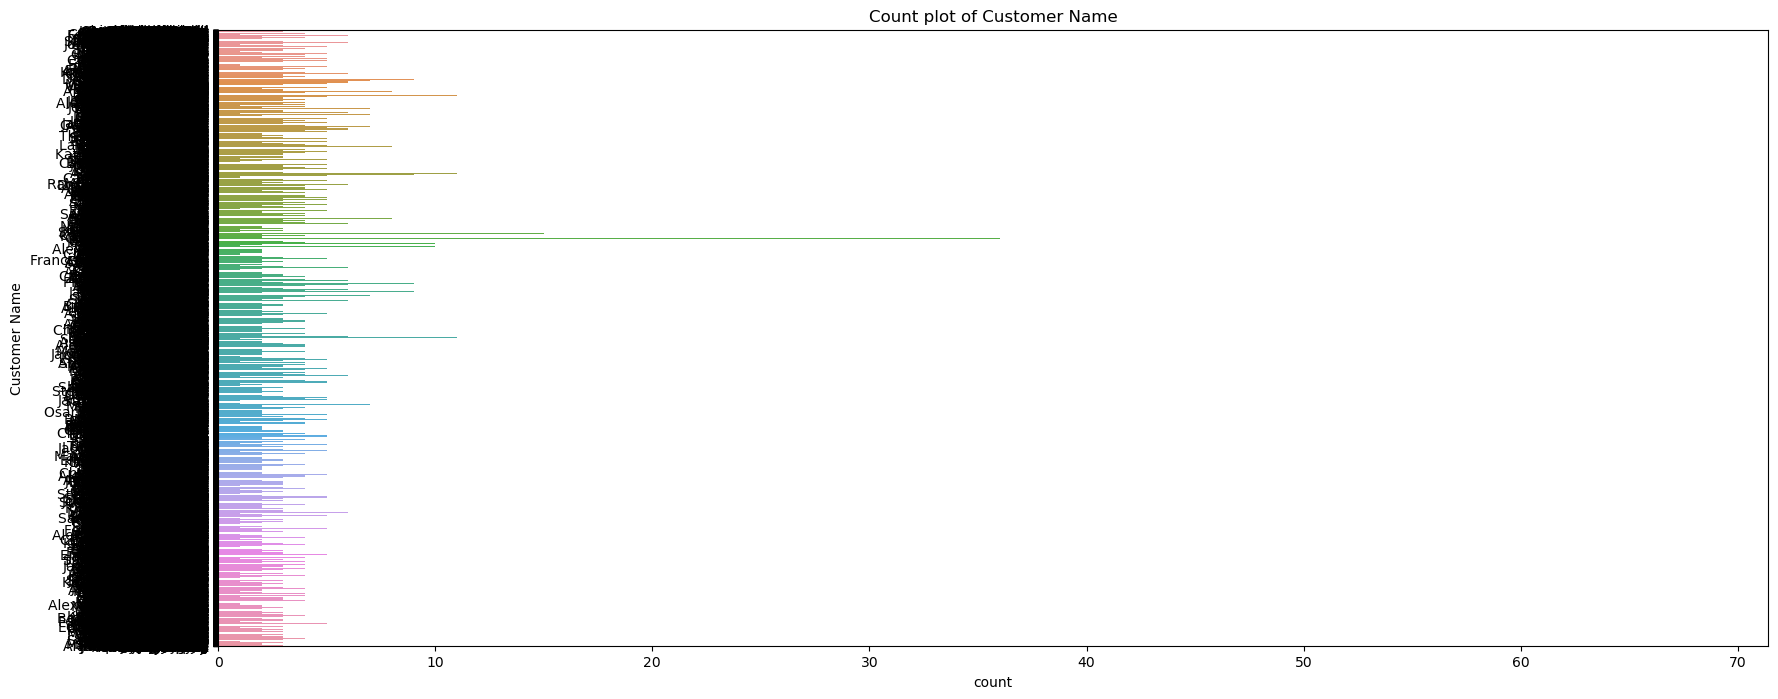

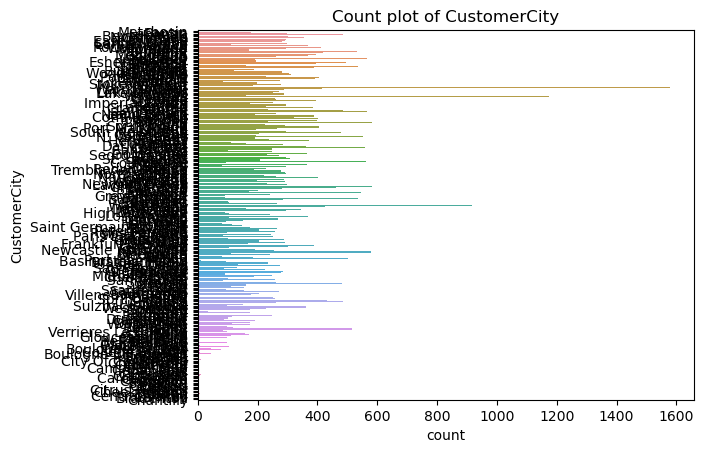

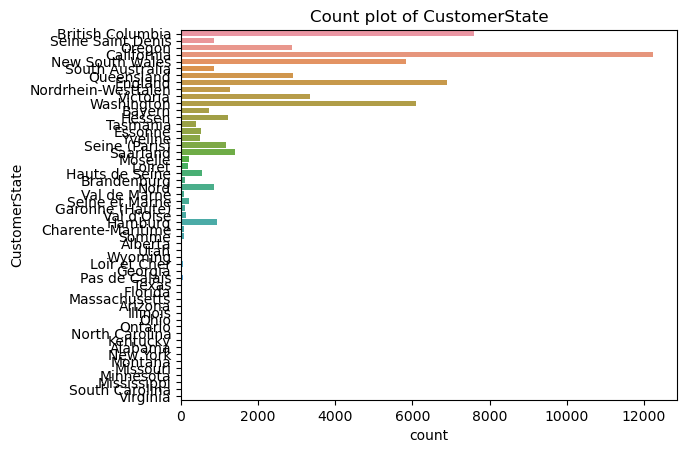

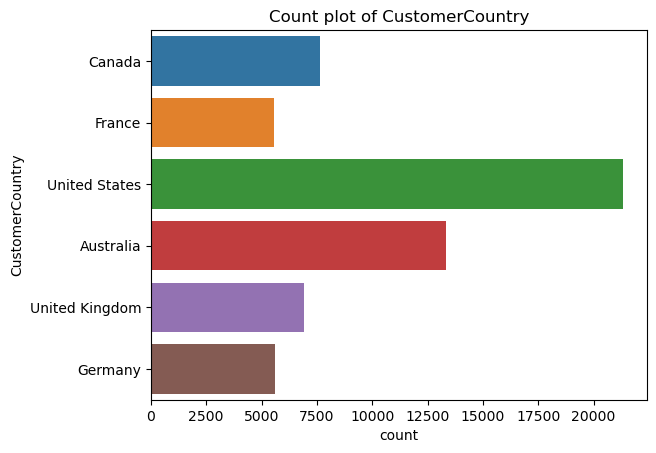

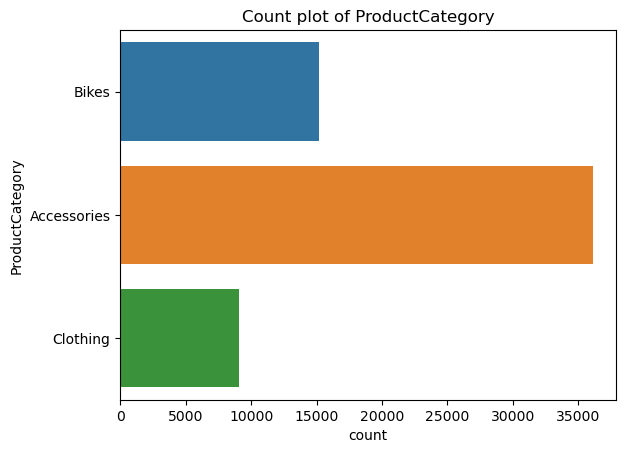

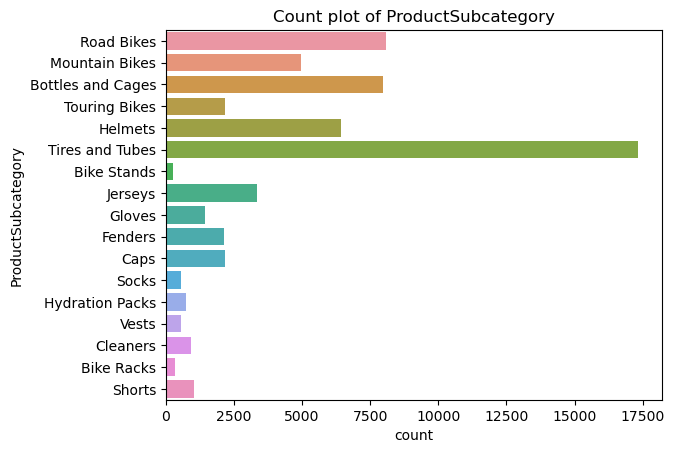

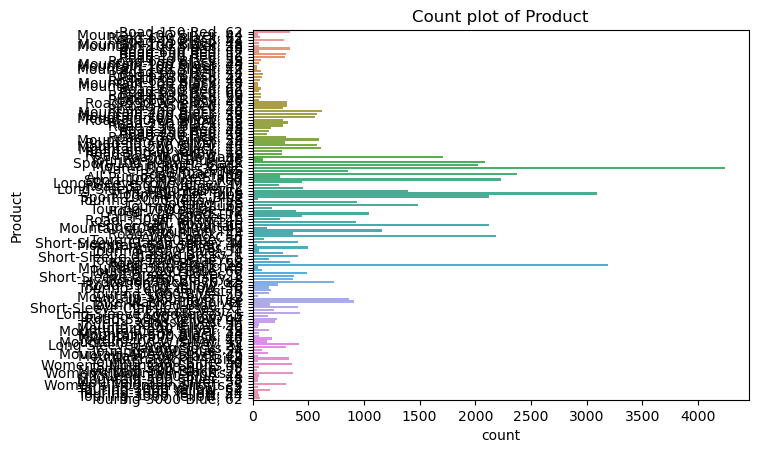

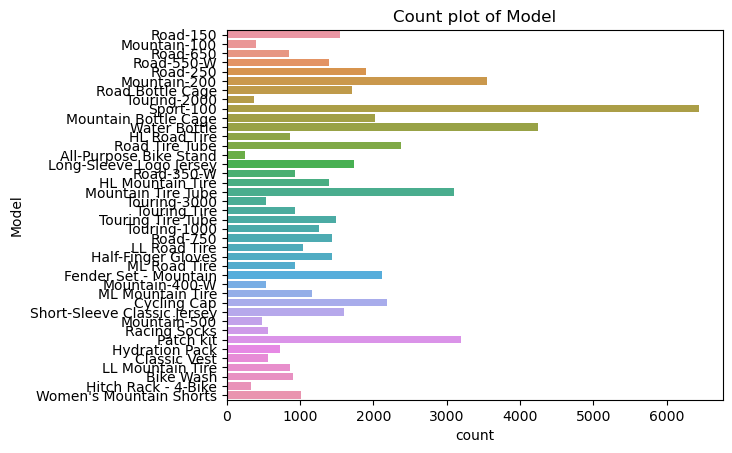

In [42]:
plt.figure(figsize=(20,20))

for col in cat_columns:
    sb.countplot(y=col, data=df)
    plt.title(f'Count plot of {col}')
    plt.show()

##### Observations 

- There are 3 product categories

- There are 6 countries with USA, Austrialia and Canada

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60398 entries, 0 to 60397
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Sales Order LineKey  60398 non-null  int64         
 1   Order Quantity       60398 non-null  int64         
 2   Item Cost            60398 non-null  float64       
 3   Item Price           60398 non-null  float64       
 4   Order Date           60398 non-null  datetime64[ns]
 5   Delivery Due Date    60398 non-null  datetime64[ns]
 6   Customer Name        60398 non-null  object        
 7   CustomerCity         60398 non-null  object        
 8   CustomerState        60398 non-null  object        
 9   CustomerCountry      60398 non-null  object        
 10  ProductCategory      60398 non-null  object        
 11  ProductSubcategory   60398 non-null  object        
 12  Product              60398 non-null  object        
 13  Model                60398 non-

In [54]:
num_col = df.select_dtypes(include=['int64', 'float64'])

In [55]:
num_columns = [i for i in num_col.columns]
num_columns

['Sales Order LineKey',
 'Order Quantity',
 'Item Cost',
 'Item Price',
 'Revenue',
 'Profit']

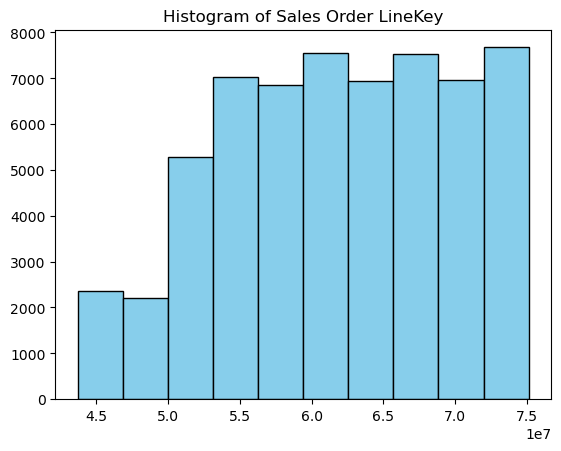

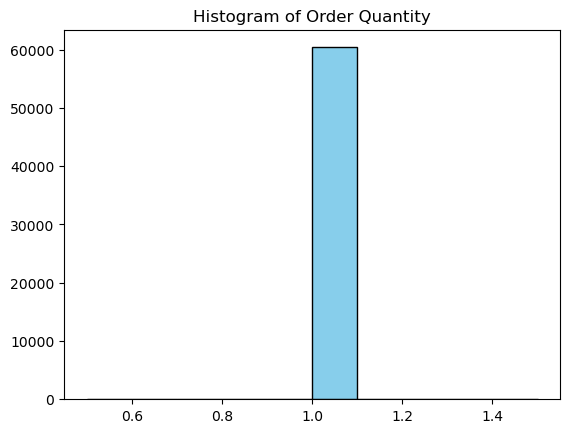

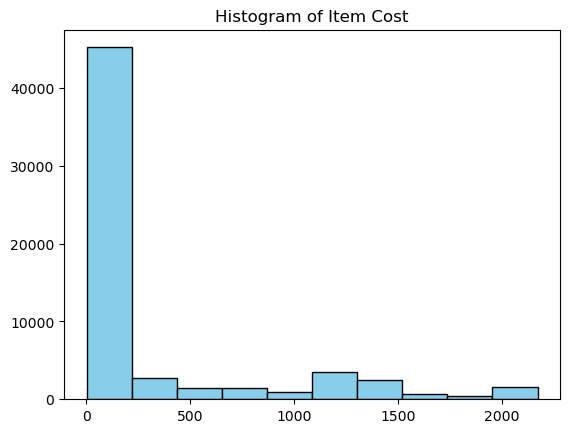

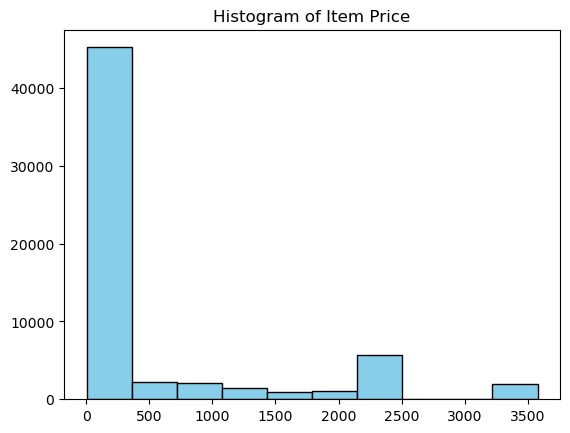

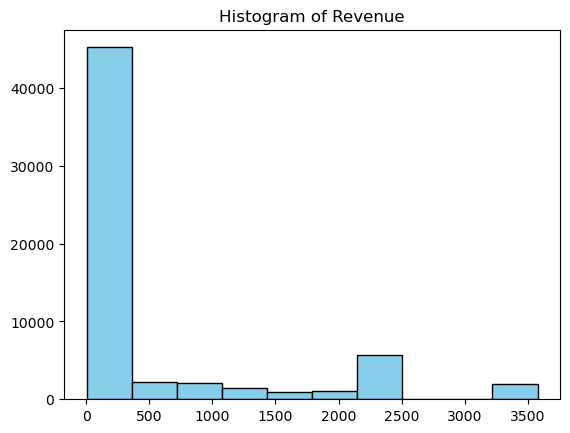

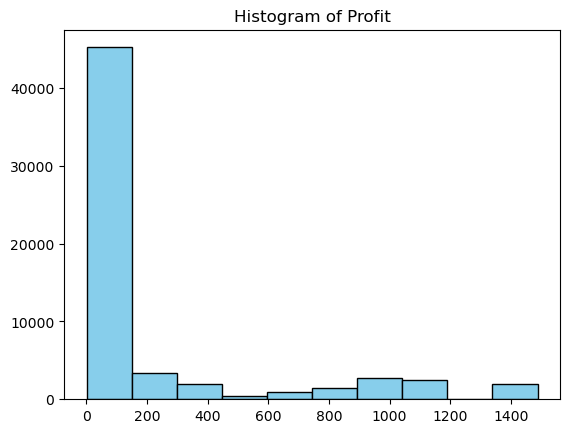

In [56]:
for column in num_columns:
    plt.hist(df[column], color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.show()

##### Observation

- Each record has a quantity of 1. 

- Most of our items don't cost much.

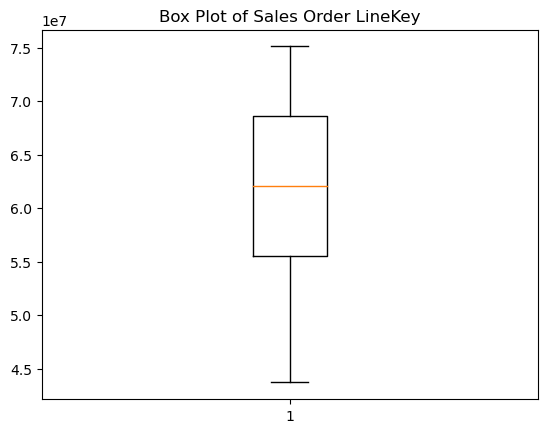

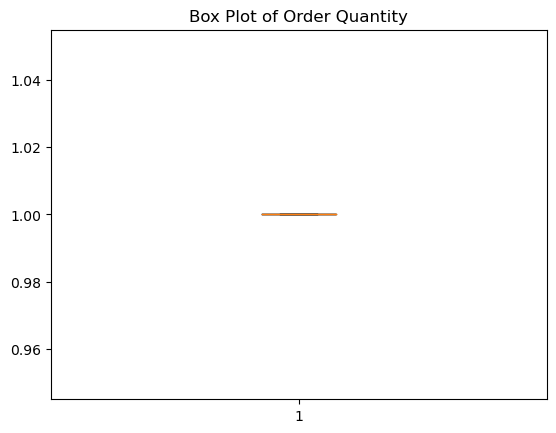

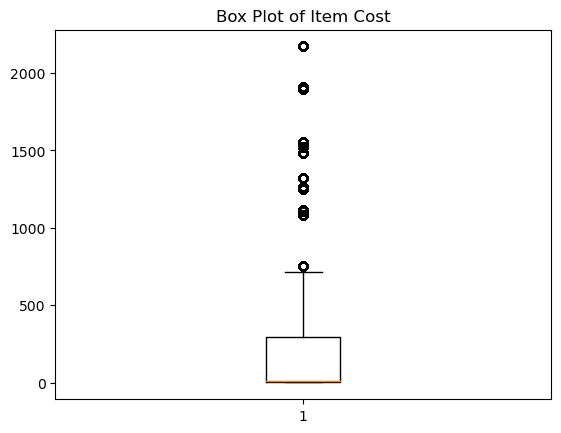

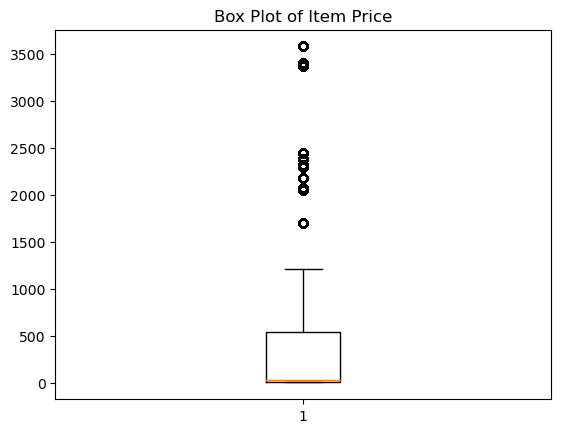

In [50]:
for column in num_columns:
    plt.boxplot(df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

###### Data Analysis

In [51]:
df['Revenue']  = df['Item Price'] * df['Order Quantity']
df['Profit'] = df['Revenue'] - df['Item Cost'] * df['Order Quantity']

In [52]:
df.head()

,Sales Order LineKey,Order Quantity,Item Cost,Item Price,Order Date,Delivery Due Date,Customer Name,CustomerCity,CustomerState,CustomerCountry,ProductCategory,ProductSubcategory,Product,Model,Revenue,Profit
0,43697001,1,2171.29,3578.27,2017-07-01,2017-07-03,Cole Watson,Metchosin,British Columbia,Canada,Bikes,Road Bikes,"Road-150 Red, 62",Road-150,3578.27,1406.98
1,43698001,1,1912.15,3399.99,2017-07-01,2017-07-03,Rachael Martinez,Pantin,Seine Saint Denis,France,Bikes,Mountain Bikes,"Mountain-100 Silver, 44",Mountain-100,3399.99,1487.84
2,43699001,1,1912.15,3399.99,2017-07-01,2017-07-03,Sydney Wright,Lebanon,Oregon,United States,Bikes,Mountain Bikes,"Mountain-100 Silver, 44",Mountain-100,3399.99,1487.84
3,43700001,1,413.15,699.10,2017-07-01,2017-07-09,Ruben Prasad,Beverly Hills,California,United States,Bikes,Road Bikes,"Road-650 Black, 62",Road-650,699.10,285.95
4,43701001,1,1912.15,3399.99,2017-07-01,2017-07-07,Christy Zhu,North Ryde,New South Wales,Australia,Bikes,Mountain Bikes,"Mountain-100 Silver, 44",Mountain-100,3399.99,1487.84


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60398 entries, 0 to 60397
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Sales Order LineKey  60398 non-null  int64         
 1   Order Quantity       60398 non-null  int64         
 2   Item Cost            60398 non-null  float64       
 3   Item Price           60398 non-null  float64       
 4   Order Date           60398 non-null  datetime64[ns]
 5   Delivery Due Date    60398 non-null  datetime64[ns]
 6   Customer Name        60398 non-null  object        
 7   CustomerCity         60398 non-null  object        
 8   CustomerState        60398 non-null  object        
 9   CustomerCountry      60398 non-null  object        
 10  ProductCategory      60398 non-null  object        
 11  ProductSubcategory   60398 non-null  object        
 12  Product              60398 non-null  object        
 13  Model                60398 non-

In [58]:
for i in num_columns:
    print(f'Stats for {i}')
    print(f'Total : {df[i].sum().round()}')
    print(f'Average : {df[i].mean().round()}')
    print('-------------------------')

Stats for Sales Order LineKey
Total : 3735578743930
Average : 61849378.0
-------------------------
Stats for Order Quantity
Total : 60398
Average : 1.0
-------------------------
Stats for Item Cost
Total : 17277858.0
Average : 286.0
-------------------------
Stats for Item Price
Total : 29358678.0
Average : 486.0
-------------------------
Stats for Revenue
Total : 29358678.0
Average : 486.0
-------------------------
Stats for Profit
Total : 12080820.0
Average : 200.0
-------------------------


##### Interesting Stats

- we generated a revenue of 29 million and a profit of 12 million

`2` Compare profit across the different countries

In [61]:
df_profitByCountry = df.groupby(by='CustomerCountry')[['Profit']].sum().round()

In [69]:
df_result = df_profitByCountry[['Profit']].sort_values(by='Profit', ascending=False)

In [70]:
df_result

,Profit
CustomerCountry,
United States,3900957.0
Australia,3685844.0
United Kingdom,1390484.0
Germany,1187365.0
France,1086259.0
Canada,829911.0


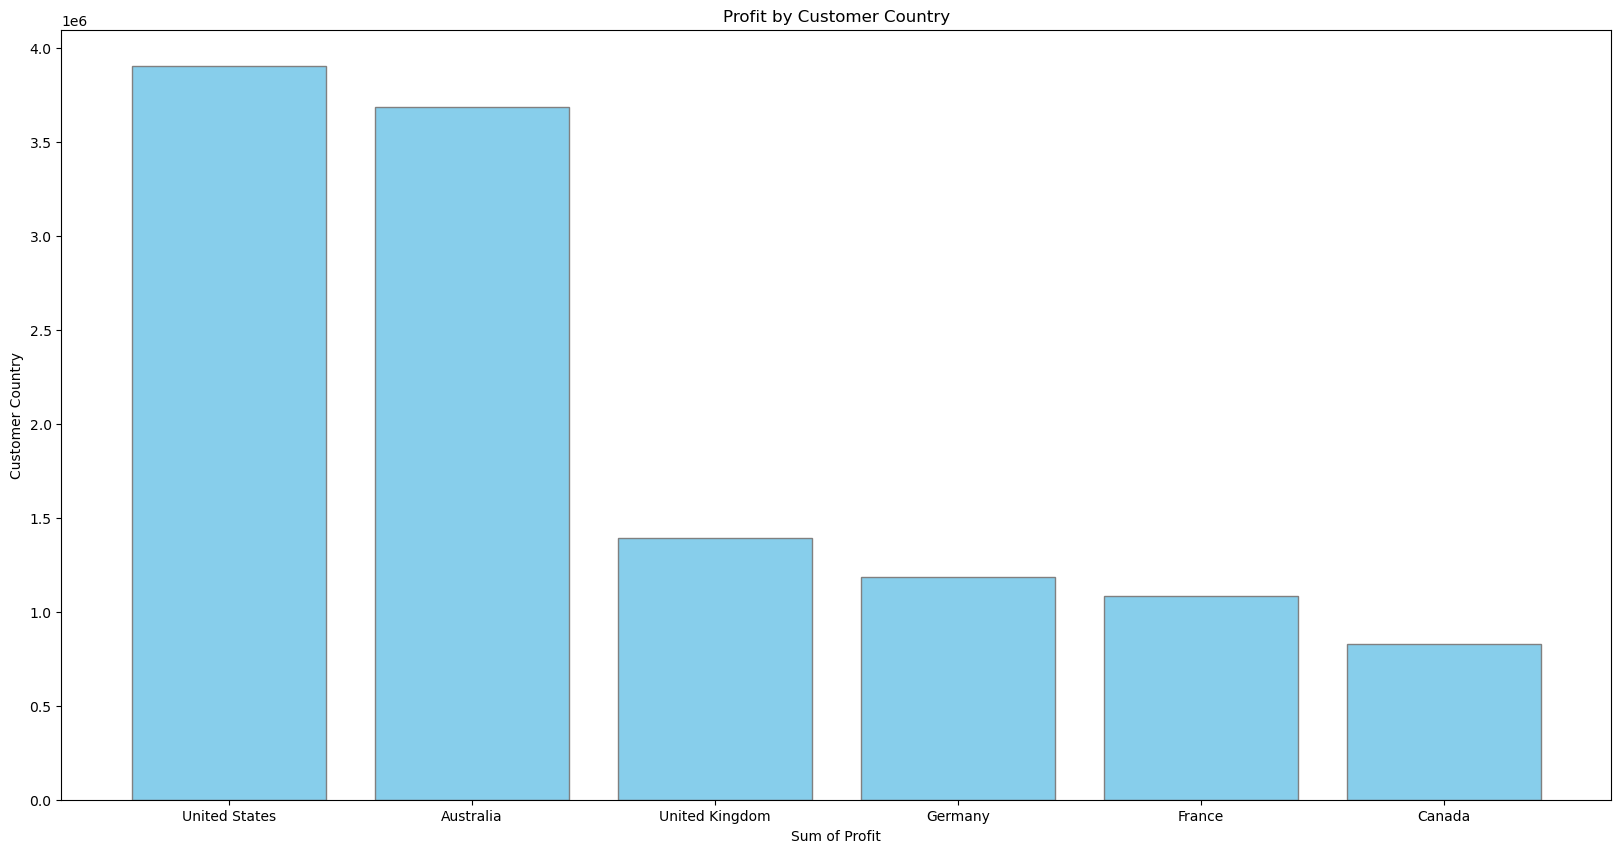

In [80]:
plt.figure(figsize=(20,10))

plt.bar(df_result.index, df_result['Profit'], color='skyblue', edgecolor='grey')
plt.title('Profit by Customer Country')
plt.xlabel('Sum of Profit')
plt.ylabel('Customer Country')
plt.show()

USA, Australia and UK generates the most profit

In [81]:
df_profitByProductCategory = df.groupby(by='ProductCategory')[['Profit']].sum().round()
df_result2 = df_profitByProductCategory[['Profit']].sort_values(by='Profit', ascending=False)

In [82]:
df_result2

,Profit
ProductCategory,
Bikes,11505799.0
Accessories,438600.0
Clothing,136421.0


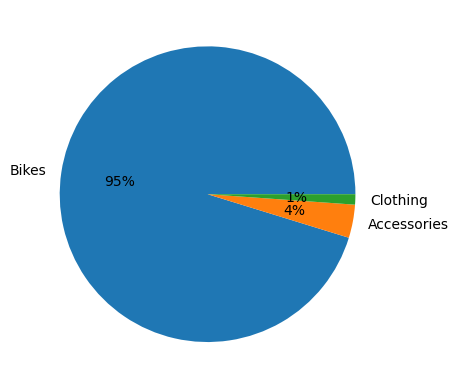

In [91]:
plt.pie(df_result2['Profit'], labels=df_result2.index, autopct='%.0f%%')
plt.show()

- The bikes product category gives us 95 of our profit